In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress
from scipy.optimize import curve_fit

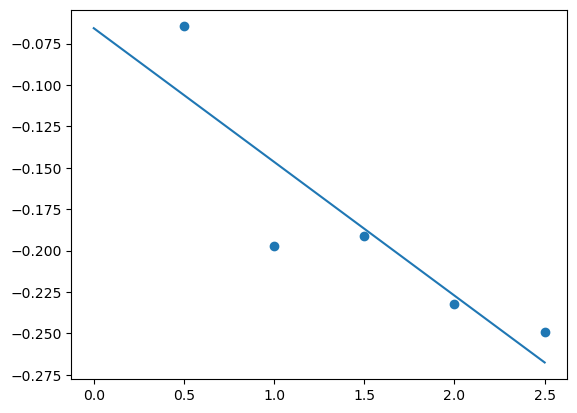

In [3]:
# Reaktionsdauer

def zeitvariation():
    m_leer = np.array([
        13.3250,
        13.6464,
        13.8632,
        13.8291,
        13.8238
    ])

    m_voll = np.array([
        13.4199,
        13.9175,
        14.1274,
        14.1433,
        14.1580
    ])

    m_proben = m_voll-m_leer
    m_proben



    V_mono = 10
    V_lose = 50
    m_ini = 50

    V_probe = 10

    dichte_mono = 0.91
    M_mono = 104.15
    M_ini = 64.21 

    m_mono = V_mono *dichte_mono
    m_prod_ges =6* m_proben

    umsatz = m_prod_ges/m_mono

    reaktionszeiten = np.array([
        .5,1,1.5,2,2.5
    ])

    tabelle_1 = pd.DataFrame({"Reaktionsdauer":reaktionszeiten, "m(Produkt) [g]":m_proben,"Umsatz":umsatz})

    fig,ax = plt.subplots()
    ax.scatter(reaktionszeiten,np.log(1-umsatz))
    tabelle_1
    k, intercept, _,_,_= linregress(reaktionszeiten,np.log(1-umsatz))
    ax.plot(np.linspace(0,2.5), np.linspace(0,2.5)*k+intercept)
zeitvariation()

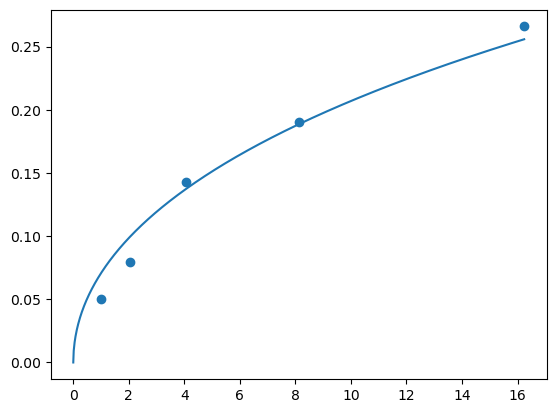

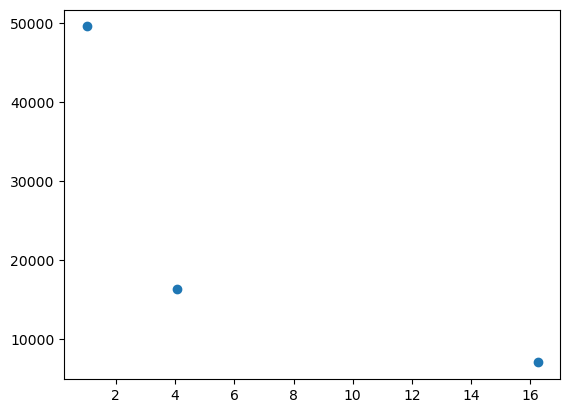

In [18]:
# 2.2
m_proben = np.array([
    0.4840,
    0.3469,
    0.2602,
    0.1446,
    0.0916
])
dichte_mono = 0.91
V_mono = 10

umsatz = m_proben/(1/5*V_mono*dichte_mono)
m_ini = np.array([
    32, 16, 8, 4,2
])
M_ini = 164.21
V_probe = 12e-3
c_ini = m_ini/(V_probe*M_ini)

fig,ax = plt.subplots()
ax.scatter(c_ini,umsatz)
def umsatzurve(i,k):
    return 1-np.exp(-k*np.sqrt(i))
opt, _ = curve_fit(umsatzurve,c_ini,umsatz,)
xs = np.linspace(0,c_ini[0],1000)
ax.plot(xs,umsatzurve(xs,*opt))



M_poly = np.array([
    7.0860e3
    ,1.6323e4
    ,4.9535e4 
])
fig, ax = plt.subplots()
ax.scatter([c_ini[0],c_ini[2],c_ini[4]],M_poly)

,Masse FLuoren,Verhältnis,m(Produkt) [g],Umsatz,Polymerisationsgrad
0,1.9999,3.507656,0.1893,0.135214,0.000000
1,1.0009,1.755494,0.2204,0.157429,0.000000
2,0.4998,0.876607,0.2593,0.185214,101.219395
3,0.2505,0.439356,0.1787,0.127643,96.793087
4,0.1249,0.219064,0.3009,0.214929,127.642823


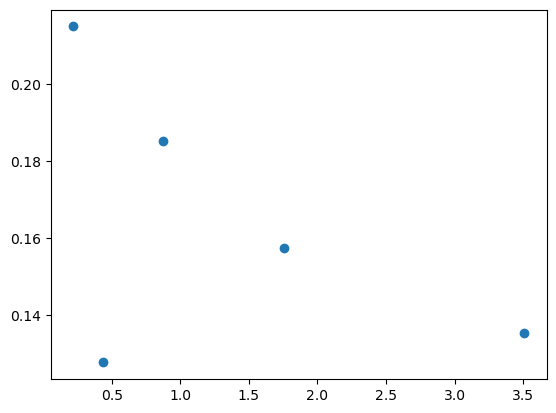

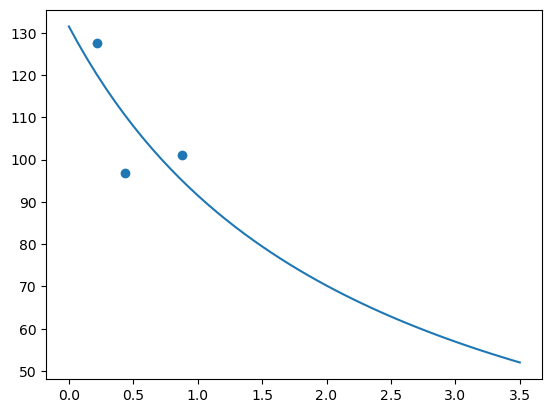

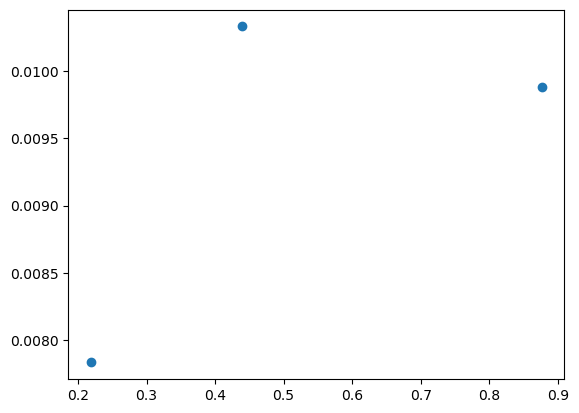

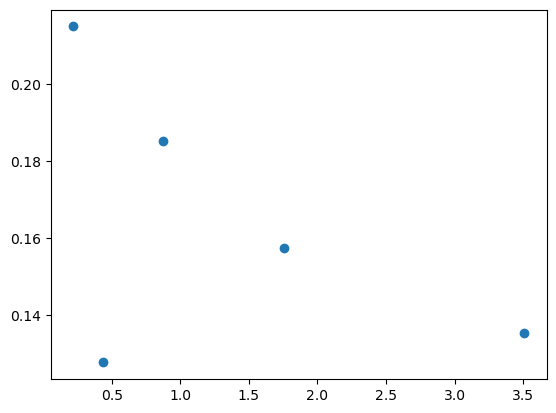

In [4]:
m_leer = np.array([
       13.8260,
       13.3484,
       13.8639,
       13.8248,
       13.3530
    ])
m_voll = np.array([
    14.0153,
    13.5688,
    14.1232,
    14.0035,
    13.6539
])

m_proben = m_voll-m_leer
m_proben
dichte_mono = 0.91
M_mono = 104.15


m_fluoren = np.array([
    1.9999,
    1.0009,
   0.4998,
    0.2505,
    0.1249
])

c_styrol = 2*dichte_mono*M_mono/12
c_fluoren = 2*166.23*m_fluoren/12

verdun = c_fluoren/c_styrol

V_mono = 10
V_lose = 55
m_ini = 55

V_probe = 10

dichte_mono = 0.91
M_mono = 104.15
M_ini = 64.21 

m_mono = V_mono *dichte_mono
m_prod_ges =6.5* m_proben

umsatz = m_prod_ges/m_mono

reaktionszeiten = 2

fig,ax = plt.subplots()


ax.scatter(verdun,umsatz)
M_poly = np.array([
    0,
    0,
    1.0542e4,
    1.0081e4,
    1.3294e4
])
polymerisationsgrad = M_poly/M_mono
tabelle_1 = pd.DataFrame({"Masse FLuoren":m_fluoren,"Verhältnis":verdun, "m(Produkt) [g]":m_proben,"Umsatz":umsatz, "Polymerisationsgrad":polymerisationsgrad})
fig,ax = plt.subplots()
ax.scatter(verdun[2:],polymerisationsgrad[2:])
def mayo(x,a,b):
    return 1/(a*x+b)

a,b = curve_fit(mayo,verdun[2:],polymerisationsgrad[2:])[0]
ax.plot(np.linspace(0,3.5),mayo(np.linspace(0,3.5),a,b))

fig,ax = plt.subplots()
ax.scatter(verdun[2:],polymerisationsgrad[2:]**-1)

fig,ax = plt.subplots()
ax.scatter(verdun,umsatz)

tabelle_1